In [1]:
import torch
import torch.nn as nn
import models
from utils import *
from utils_pipeline1 import *

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

# Deep Learning Project 1 Experiences Part 1

_The goal of this project is to, given the images of two digits (14 x 14), predict which is one is bigger._

_In order to tackle this problem we decided to try different architectures and techniques. Here is our roadmap:_


### _Treat the inputs (2 images) like two dependent channels_
- _A. Network with 2 convolutionnal layers_
- _B. Network with 3 convolutionnal layers_
    - _without the use of an auxiliary loss_
    - _with the use of an auxialiry loss (similar to the one used in GoogLeNet) having the same objective as the primary loss_
- _C. Network with 4 convolutionnal layers_
    - _without the use of an auxiliary loss_
    - _with the use of an auxialiry loss (similar to the one used in GoogLeNet) having the same objective as the primary loss_


_We will now present the result of all our experiments in part 1 in this notebook. For better understanding of our pipeline, have a look at the dedicated notebooks._

## Global parameters

In [21]:
BATCH_SIZE = 64

# for evaluating model
nb_rounds = 15

# for cross-validation
K = 5

## Generate data and normalize it

In [4]:
train_input, train_target, train_classes, test_input, test_target, test_classes = generate_data_device(1000, device=device)

In [5]:
train_input = normalize_data(train_input)
test_input = normalize_data(test_input)

In [6]:
print("Training set mean = {a}".format(a = train_input.mean().item()))
print("Training set std = {s}\n".format(s = train_input.std().item()))
print("Test set mean = {a}".format(a = test_input.mean().item()))
print("Test set std = {s}".format(s = test_input.std().item()))

Training set mean = -1.1463554550061872e-08
Training set std = 1.0

Test set mean = 2.992591134898248e-07
Test set std = 0.9999999403953552


## 1. Treat the inputs (2 images) like two dependent channels

### A. Network with 2 convolutionnal layers

In [7]:
network_class_1 = models.BaselineNetwork
network_1 = network_class_1().to(device=device)
print(network_1)

BaselineNetwork(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


_We chose the optimizer parameter that gave us the best results overall and ensured convergence._ 

In [8]:
train_accuracies_1, train_losses_1, test_accuracies_1, test_losses_1 = train_model(network_1,
                                                                           train_input, 
                                                                           train_target, 
                                                                           train_classes, 
                                                                           test_input, 
                                                                           test_target, 
                                                                           test_classes, 
                                                                           100, 
                                                                           BATCH_SIZE, 
                                                                           {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97}, 
                                                                           logging = True,
                                                                           )

Epoch       Time    Train loss     Train accuracy      Test loss      Test accuracy       
[100/100]   46s     0.0004         100.0000            18.8643        84.6000             


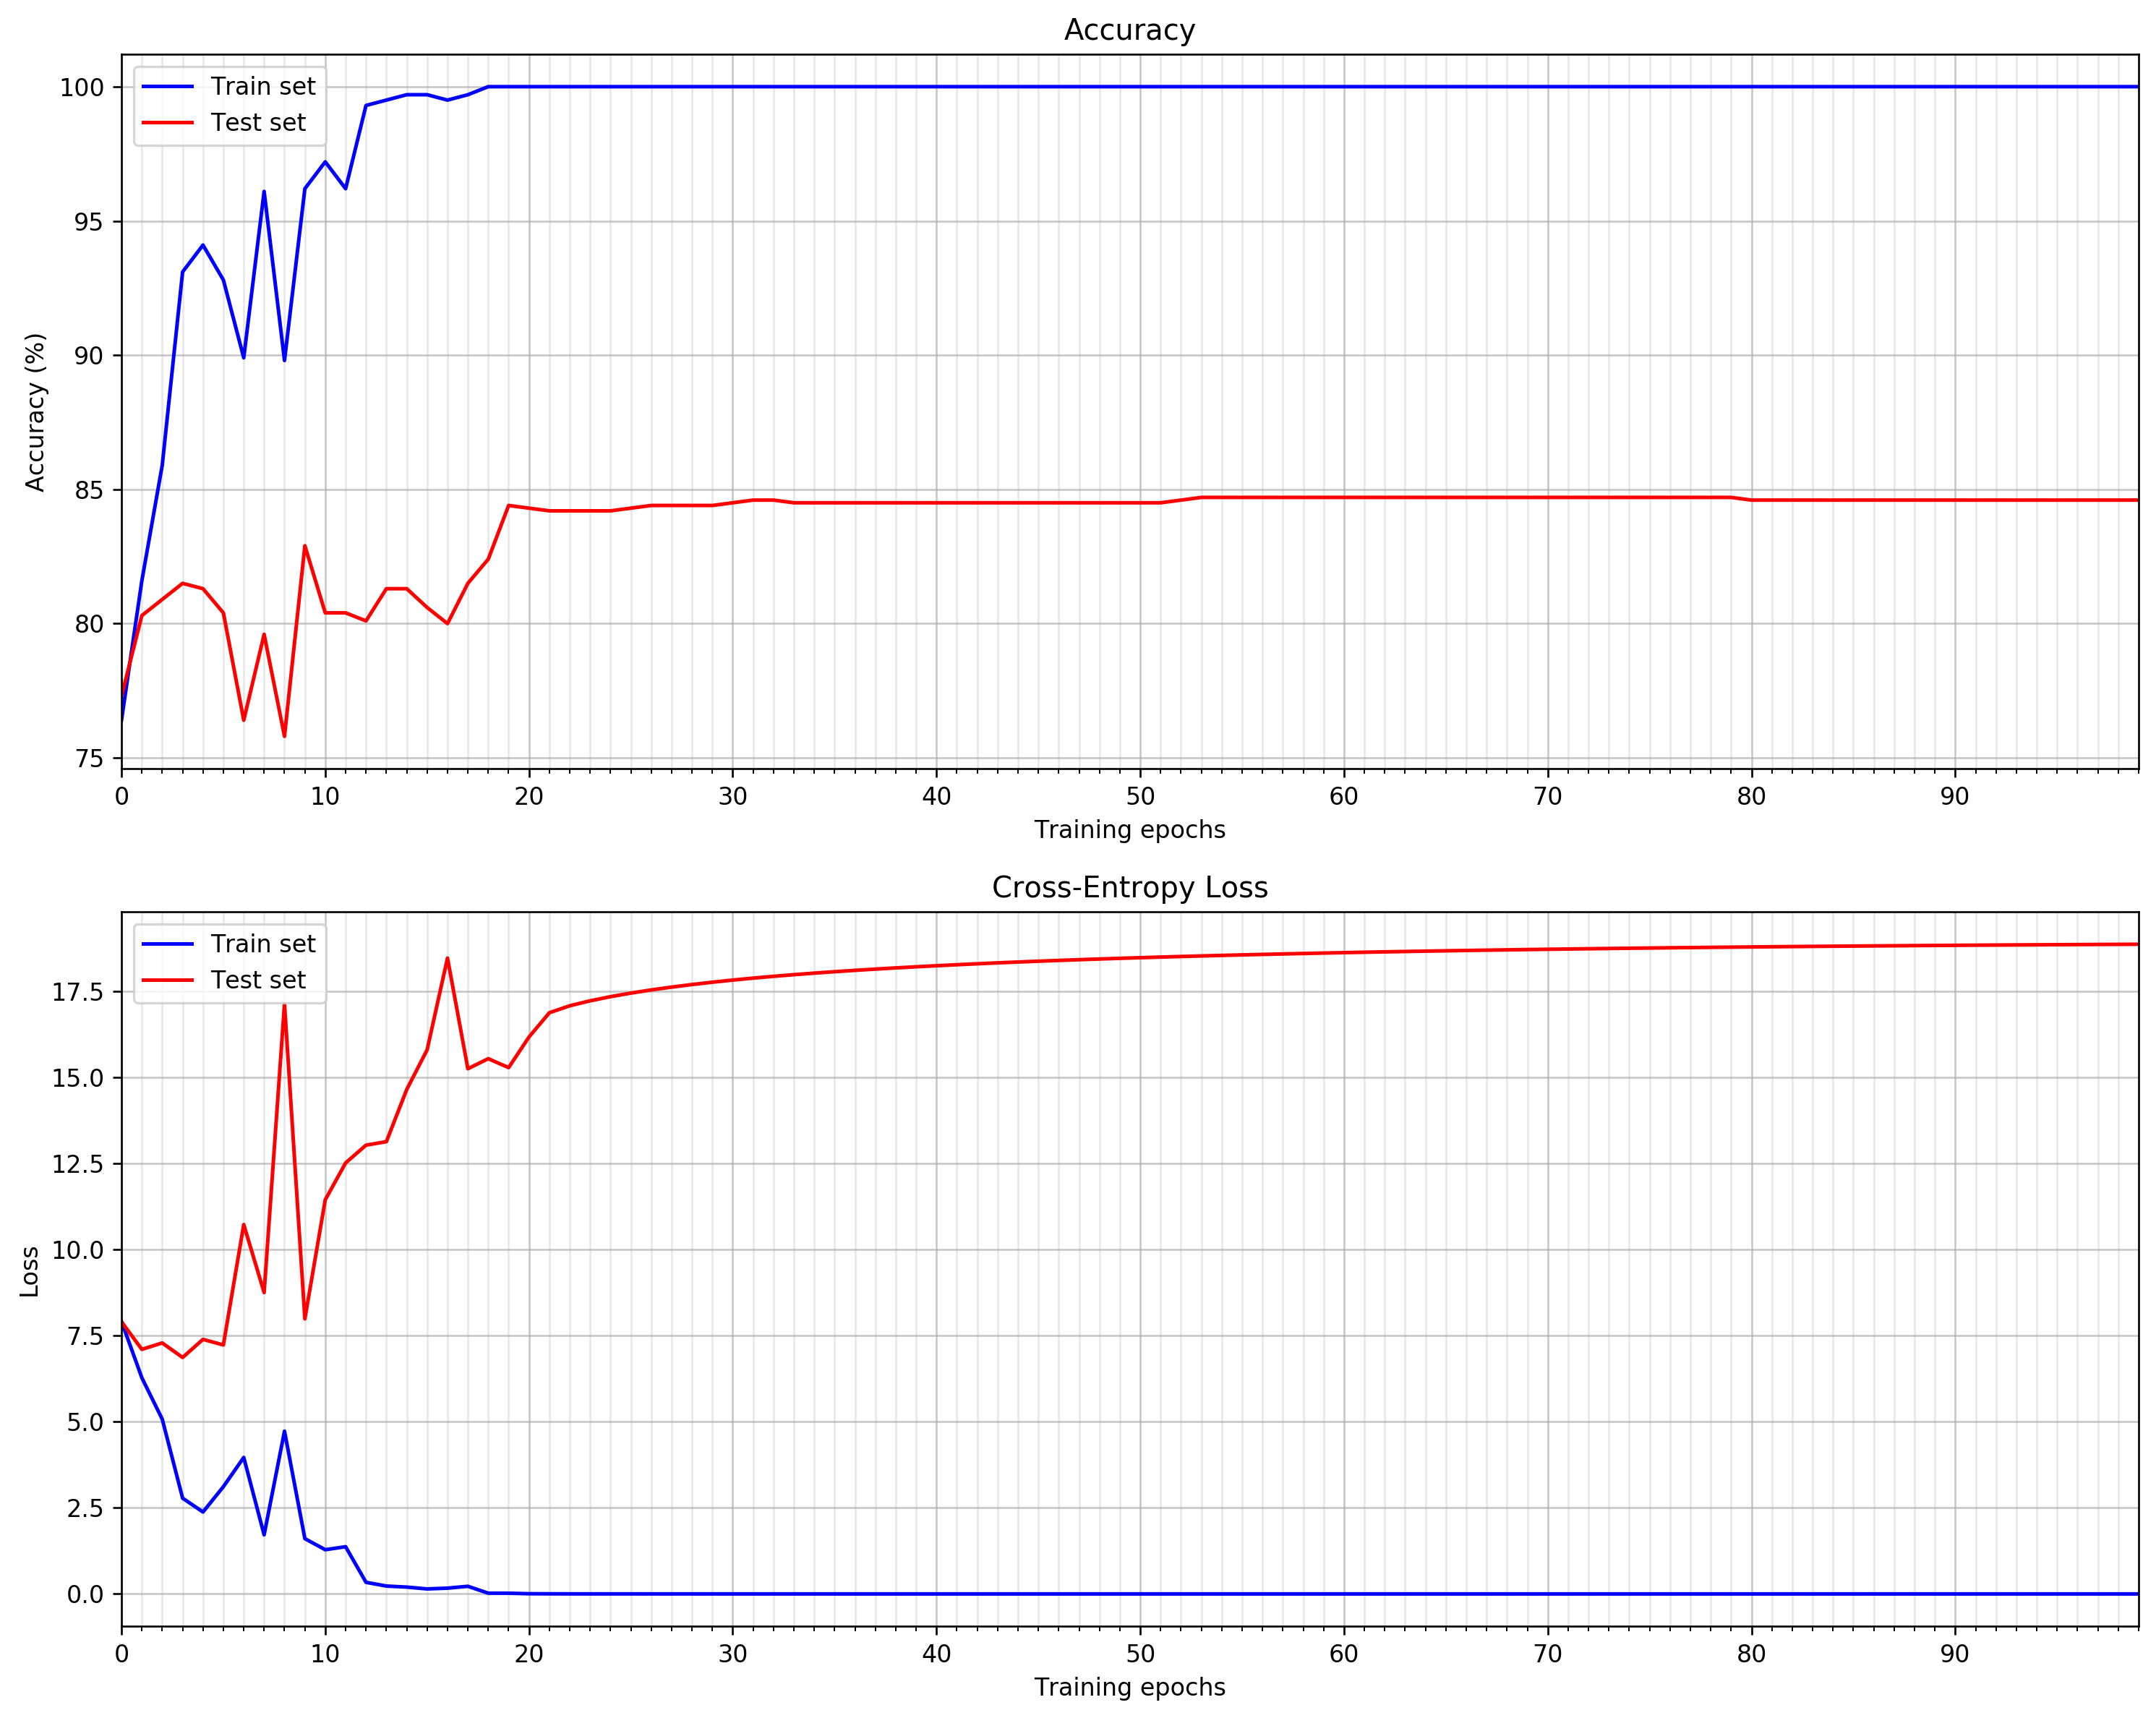

In [9]:
plot_acc_loss(train_accuracies_1, train_losses_1, test_accuracies_1, test_losses_1)

_We now evaluate our model to obtain a mean accuracy as well as the accuracy standard deviation._

_As can be see, the model converges after ~30 epochs. We will evaluate it on 60 epochs._

In [11]:
accuracies_1 = evaluate_model(network_class_1, nb_rounds, nn.CrossEntropyLoss(), device, BATCH_SIZE, 60, {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97})

Round 1: accuracy = 82.40% | loss = 20.9363
Round 2: accuracy = 81.90% | loss = 20.9475
Round 3: accuracy = 82.50% | loss = 22.2150
Round 4: accuracy = 80.70% | loss = 23.2953
Round 5: accuracy = 82.20% | loss = 21.0923
Round 6: accuracy = 81.90% | loss = 22.2682
Round 7: accuracy = 81.50% | loss = 22.3898
Round 8: accuracy = 79.60% | loss = 24.6005
Round 9: accuracy = 81.00% | loss = 23.1514
Round 10: accuracy = 83.00% | loss = 20.3197
Round 11: accuracy = 82.30% | loss = 22.0099
Round 12: accuracy = 81.70% | loss = 20.1130
Round 13: accuracy = 82.00% | loss = 19.5302
Round 14: accuracy = 80.50% | loss = 26.2039
Round 15: accuracy = 81.40% | loss = 19.9904


In [12]:
print("The mean accuracy is: {a:0.2f}".format(a = accuracies_1.mean()))
print("The accuracy std is: {s:0.4f}".format(s = accuracies_1.std()))

The mean accuracy is: 81.64
The accuracy std is: 0.8871


### B. Network with 3 convolutionnal layers
#### 1. without the use of an auxiliary loss

In [13]:
network_class_2 = models.Net2
network_2 = network_class_2(aux_loss = False).to(device=device)
print(network_2)

Net2(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [14]:
train_accuracies_2, train_losses_2, test_accuracies_2, test_losses_2 = train_model(network_2,
                                                                           train_input, 
                                                                           train_target, 
                                                                           train_classes, 
                                                                           test_input, 
                                                                           test_target, 
                                                                           test_classes, 
                                                                           100, 
                                                                           BATCH_SIZE, 
                                                                           {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97}, 
                                                                           logging = True,
                                                                           )

Epoch       Time    Train loss     Train accuracy      Test loss      Test accuracy       
[100/100]   119s    5.2876         98.3000             7.5247         83.9000             


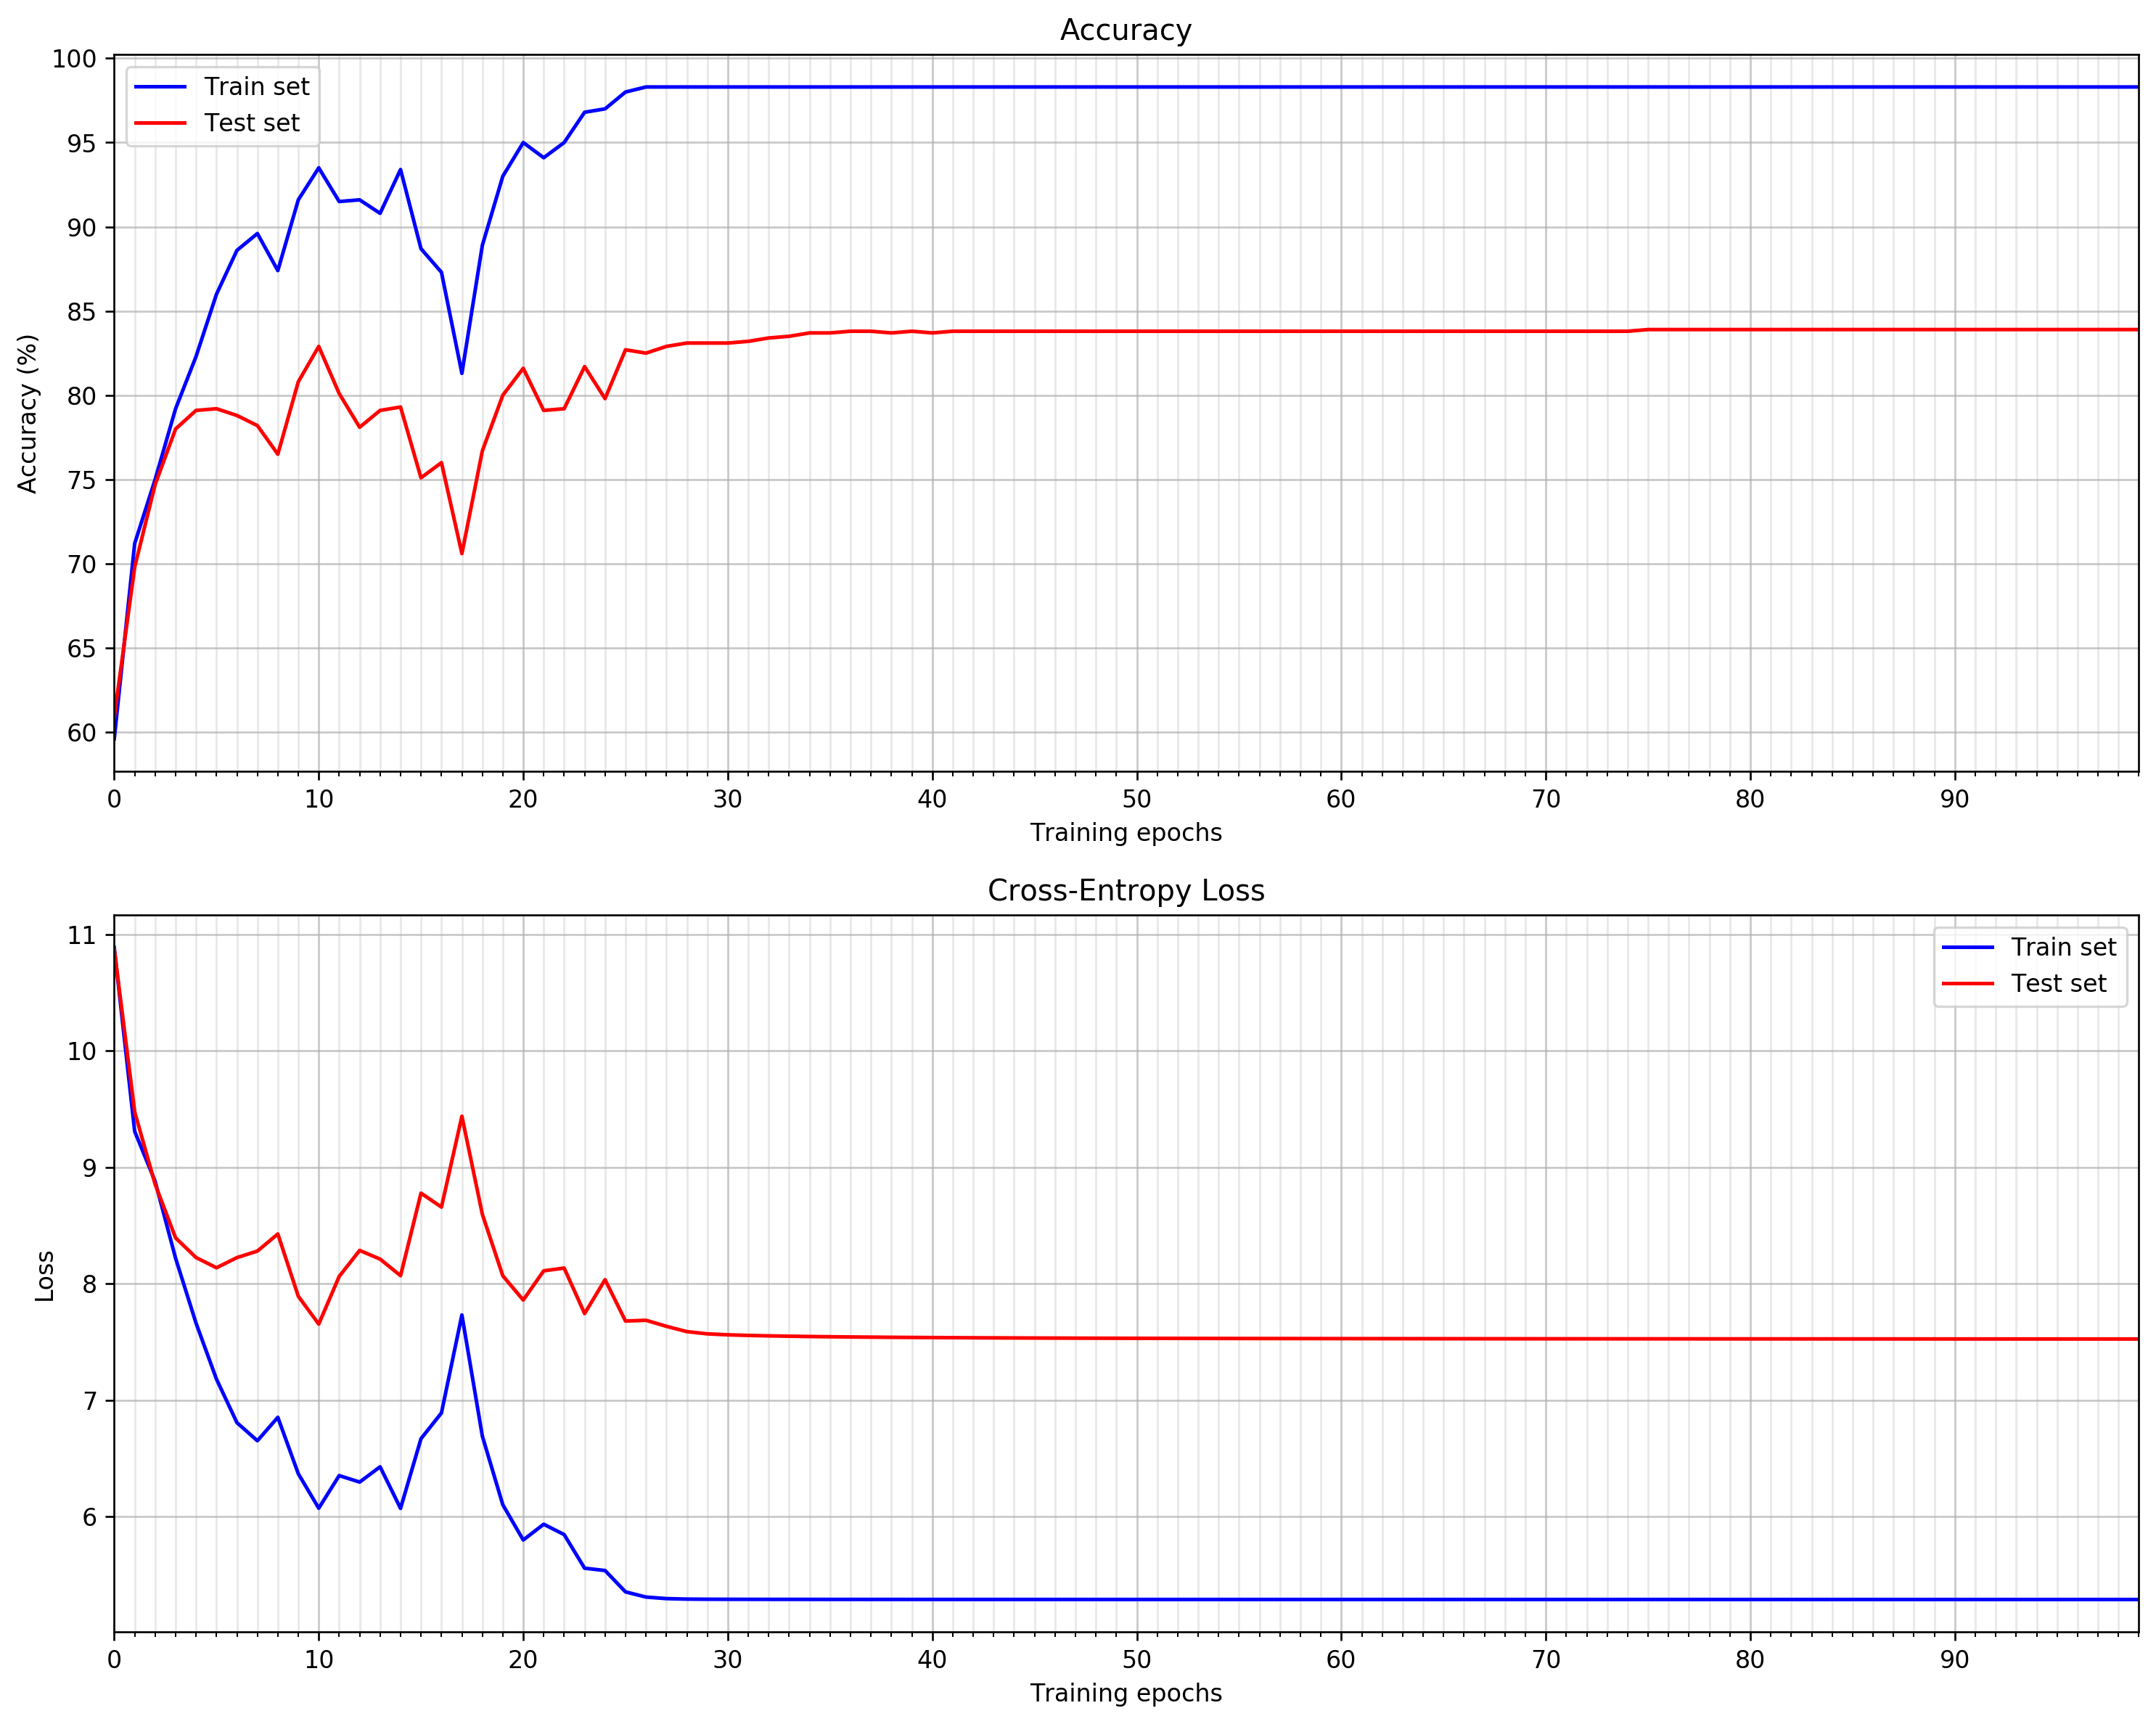

In [15]:
plot_acc_loss(train_accuracies_2, train_losses_2, test_accuracies_2, test_losses_2)

In [16]:
accuracies_2 = evaluate_model(network_class_2, nb_rounds, nn.CrossEntropyLoss(), device, BATCH_SIZE, 60, {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97})

Round 1: accuracy = 80.20% | loss = 7.9946
Round 2: accuracy = 83.20% | loss = 7.5867
Round 3: accuracy = 79.50% | loss = 8.1280
Round 4: accuracy = 83.30% | loss = 7.6186
Round 5: accuracy = 82.20% | loss = 7.7374
Round 6: accuracy = 80.50% | loss = 7.9803
Round 7: accuracy = 81.60% | loss = 7.7654
Round 8: accuracy = 81.60% | loss = 7.7443
Round 9: accuracy = 82.20% | loss = 7.7216
Round 10: accuracy = 82.70% | loss = 7.5879
Round 11: accuracy = 84.10% | loss = 7.3971
Round 12: accuracy = 83.20% | loss = 7.7055
Round 13: accuracy = 82.70% | loss = 7.6706
Round 14: accuracy = 79.90% | loss = 8.0670
Round 15: accuracy = 81.50% | loss = 7.8169


In [17]:
print("The mean accuracy is: {a:0.2f}".format(a = accuracies_2.mean()))
print("The accuracy std is: {s:0.4f}".format(s = accuracies_2.std()))

The mean accuracy is: 81.89
The accuracy std is: 1.3781


#### 2. with the use of an auxialiry loss (similar to the one used in GoogLeNet) having the same objective as the primary loss

In [18]:
network_2_aux_loss = network_class_2(aux_loss = True).to(device=device)
print(network_2_aux_loss)

Net2(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc1_aux): Linear(in_features=1600, out_features=128, bias=True)
  (fc2_aux): Linear(in_features=128, out_features=2, bias=True)
)


_This time an auxiliary loss is used for training._

In [19]:
train_accuracies_2_aux, train_losses_2_aux, test_accuracies_2_aux, test_losses_2_aux = train_model(network_2_aux_loss,
                                                                           train_input, 
                                                                           train_target, 
                                                                           train_classes, 
                                                                           test_input, 
                                                                           test_target, 
                                                                           test_classes, 
                                                                           100, 
                                                                           BATCH_SIZE, 
                                                                           {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97}, 
                                                                           logging = True,
                                                                           with_aux_loss = True)

Epoch       Time    Train loss     Train accuracy      Test loss      Test accuracy       
[100/100]   132s    7.9136         98.5000             11.6321        81.8000             


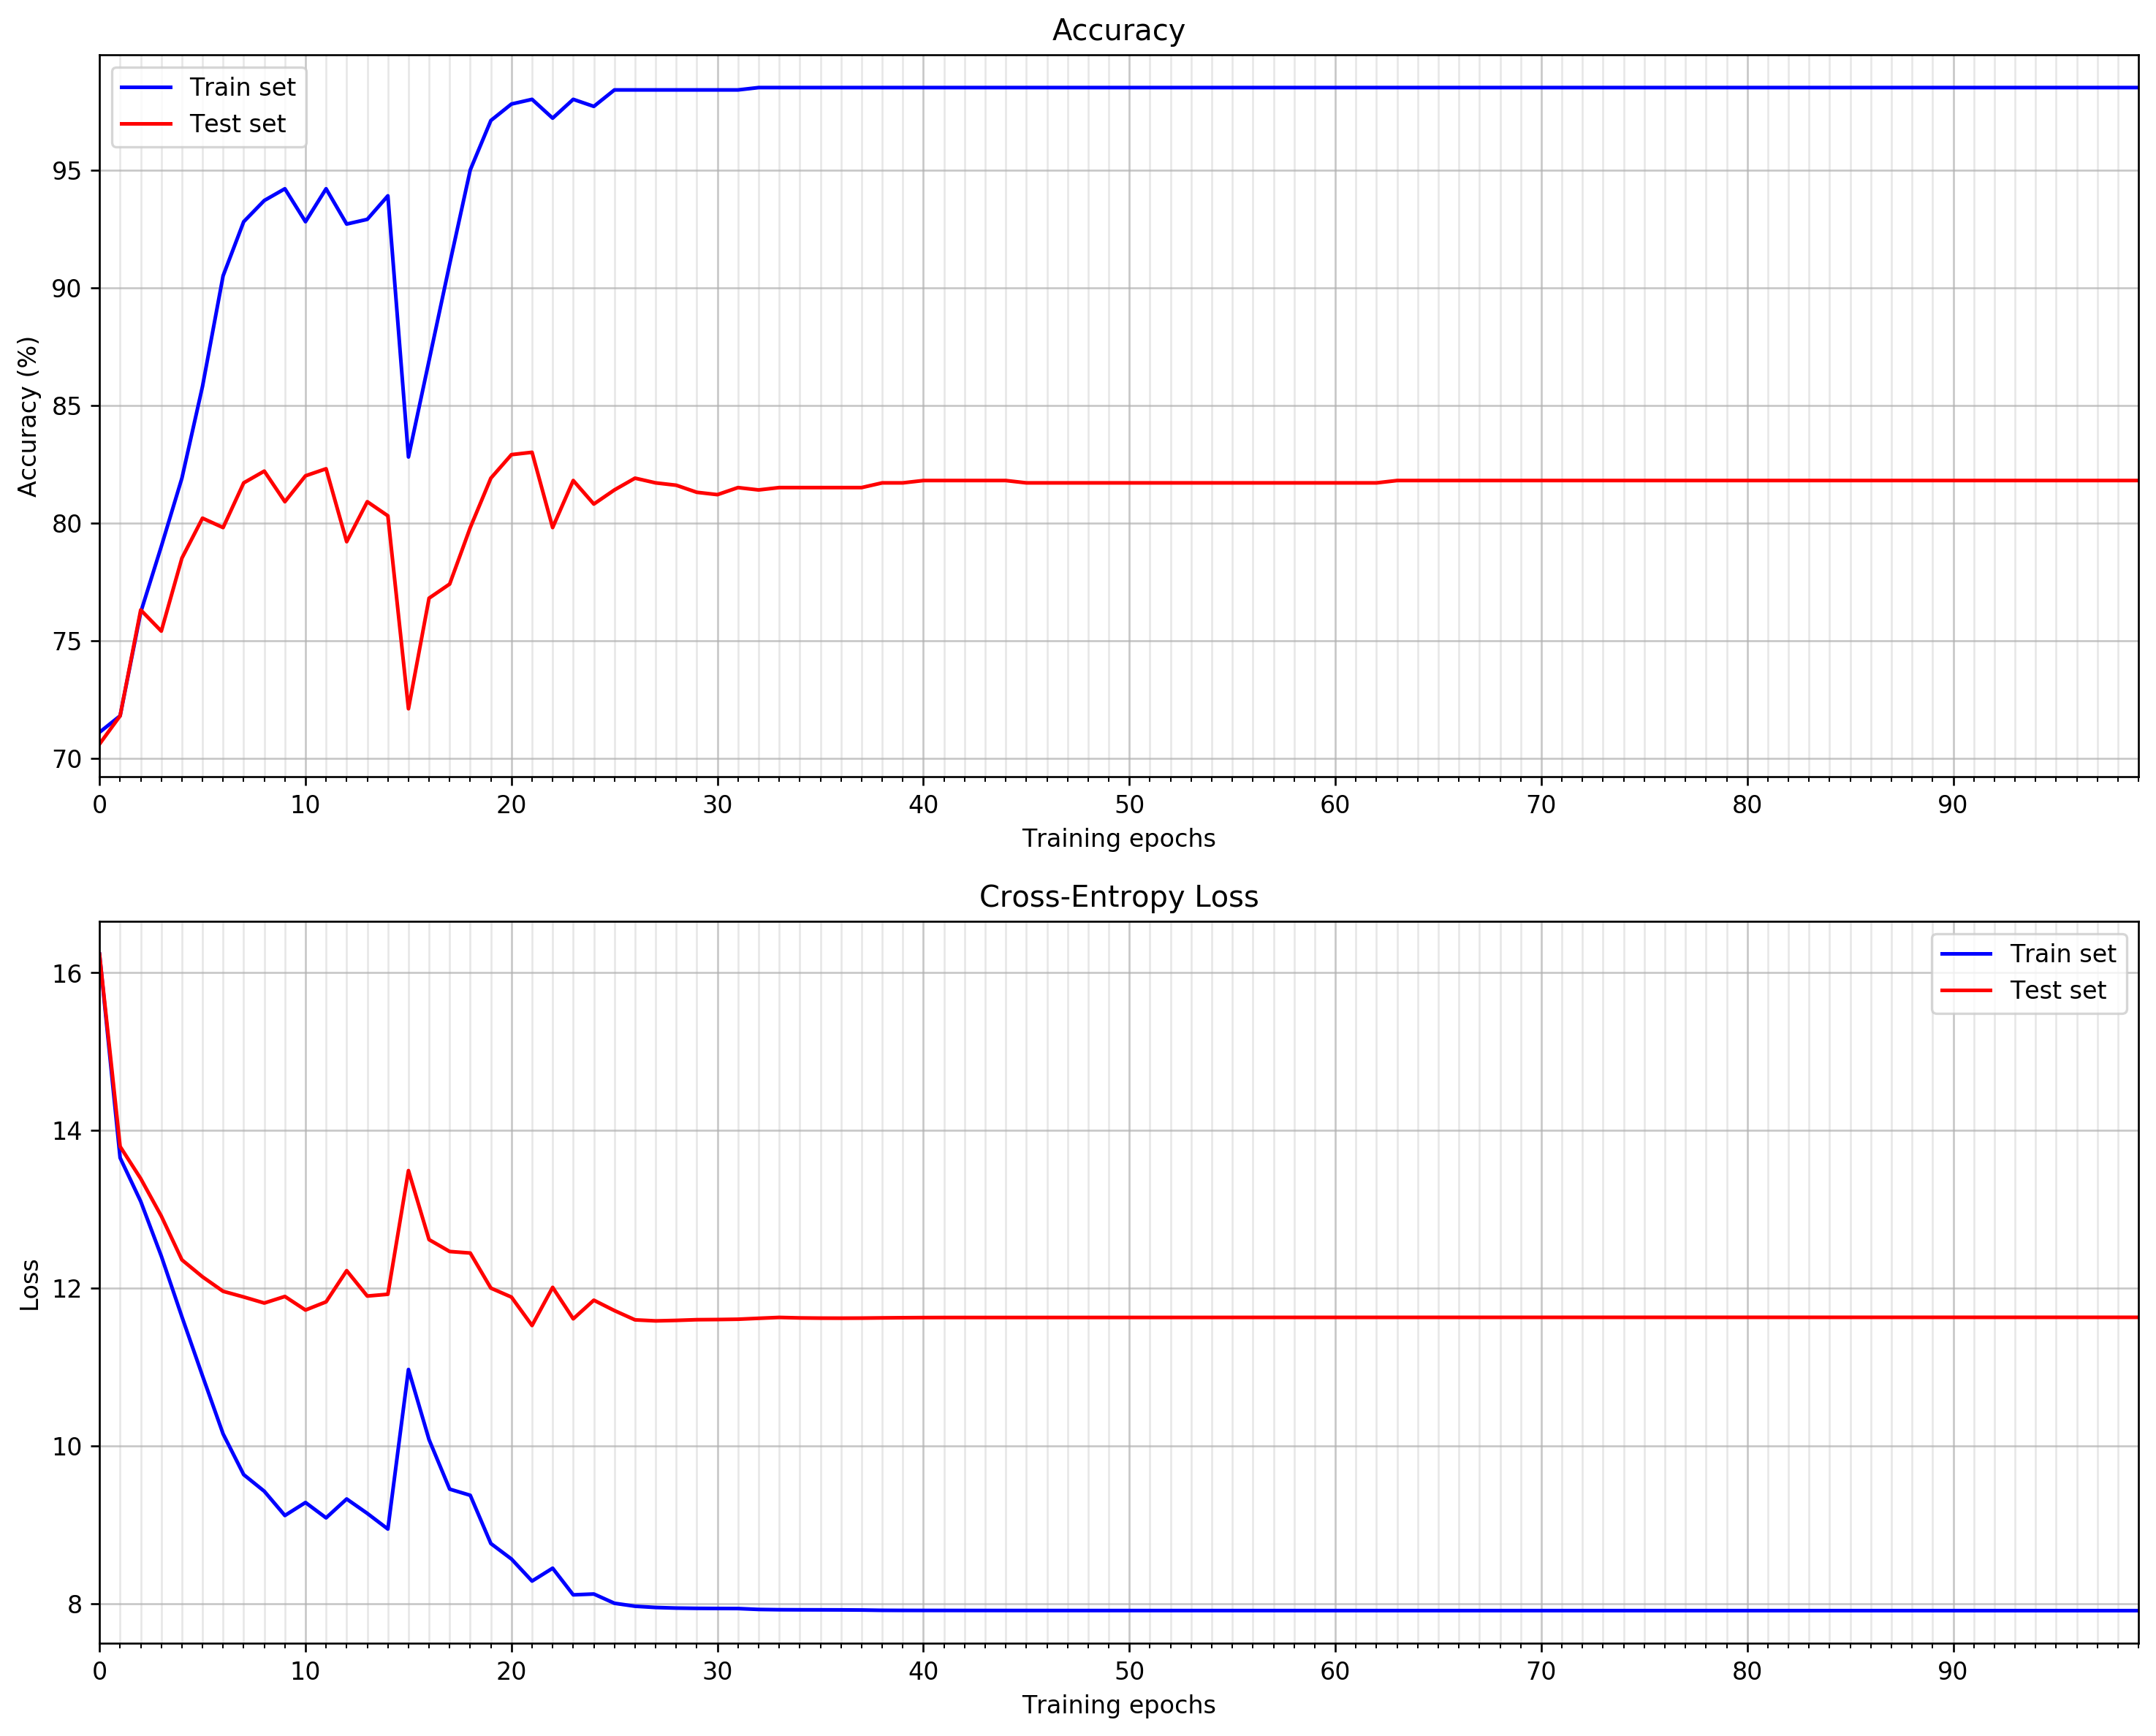

In [20]:
plot_acc_loss(train_accuracies_2_aux, train_losses_2_aux, test_accuracies_2_aux, test_losses_2_aux)

_Because we now have an hyperparameter (aux_loss_alpha), we will tune it using cross validation._

In [22]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
best_alpha_1, best_accuracy_1 = cross_validation(network_class_2,
                                             K,
                                             train_input,
                                             train_target,
                                             train_classes,
                                             device,
                                             BATCH_SIZE,
                                             50,
                                             alphas)

aux_loss_alpha = 0.1 - mean accuracy = 82.1
aux_loss_alpha = 0.3 - mean accuracy = 79.0
aux_loss_alpha = 0.5 - mean accuracy = 83.0
aux_loss_alpha = 0.7 - mean accuracy = 80.6
aux_loss_alpha = 0.9 - mean accuracy = 79.7


In [23]:
print("The best aux_loss_alpha is: {a}".format(a = best_alpha_1))

The best aux_loss_alpha is: 0.5


In [24]:
accuracies_2_aux = evaluate_model(network_class_2,
                                    nb_rounds,
                                    nn.CrossEntropyLoss(),
                                    device, BATCH_SIZE,
                                    60,
                                    {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97},
                                    {'aux_loss': True},
                                    with_aux_loss = True,
                                    aux_loss_alpha = best_alpha_1)

Round 1: accuracy = 82.70% | loss = 11.5825
Round 2: accuracy = 82.40% | loss = 11.5729
Round 3: accuracy = 83.40% | loss = 11.3843
Round 4: accuracy = 82.80% | loss = 11.4179
Round 5: accuracy = 82.20% | loss = 11.5921
Round 6: accuracy = 83.00% | loss = 11.5383
Round 7: accuracy = 81.80% | loss = 11.7895
Round 8: accuracy = 81.60% | loss = 11.6777
Round 9: accuracy = 81.30% | loss = 11.7714
Round 10: accuracy = 82.00% | loss = 11.6481
Round 11: accuracy = 82.70% | loss = 11.4247
Round 12: accuracy = 82.10% | loss = 11.6235
Round 13: accuracy = 82.60% | loss = 11.5242
Round 14: accuracy = 81.40% | loss = 11.7559
Round 15: accuracy = 83.70% | loss = 11.2655


In [25]:
print("The mean accuracy is: {a:0.2f}".format(a = accuracies_2_aux.mean()))
print("The accuracy std is: {s:0.4f}".format(s = accuracies_2_aux.std()))

The mean accuracy is: 82.38
The accuracy std is: 0.7033


### C. Network with 4 convolutionnal layers
#### 1. without the use of an auxiliary loss

In [26]:
network_class_3 = models.Net3
network_3 = network_class_3(aux_loss = False).to(device=device)
print(network_3)

Net3(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [27]:
train_accuracies_3, train_losses_3, test_accuracies_3, test_losses_3 = train_model(network_3,
                                                                           train_input, 
                                                                           train_target, 
                                                                           train_classes, 
                                                                           test_input, 
                                                                           test_target, 
                                                                           test_classes, 
                                                                           100, 
                                                                           BATCH_SIZE, 
                                                                           {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97}, 
                                                                           logging = True,
                                                                           )

Epoch       Time    Train loss     Train accuracy      Test loss      Test accuracy       
[100/100]   95s     5.5784         96.5000             8.1325         79.3000             


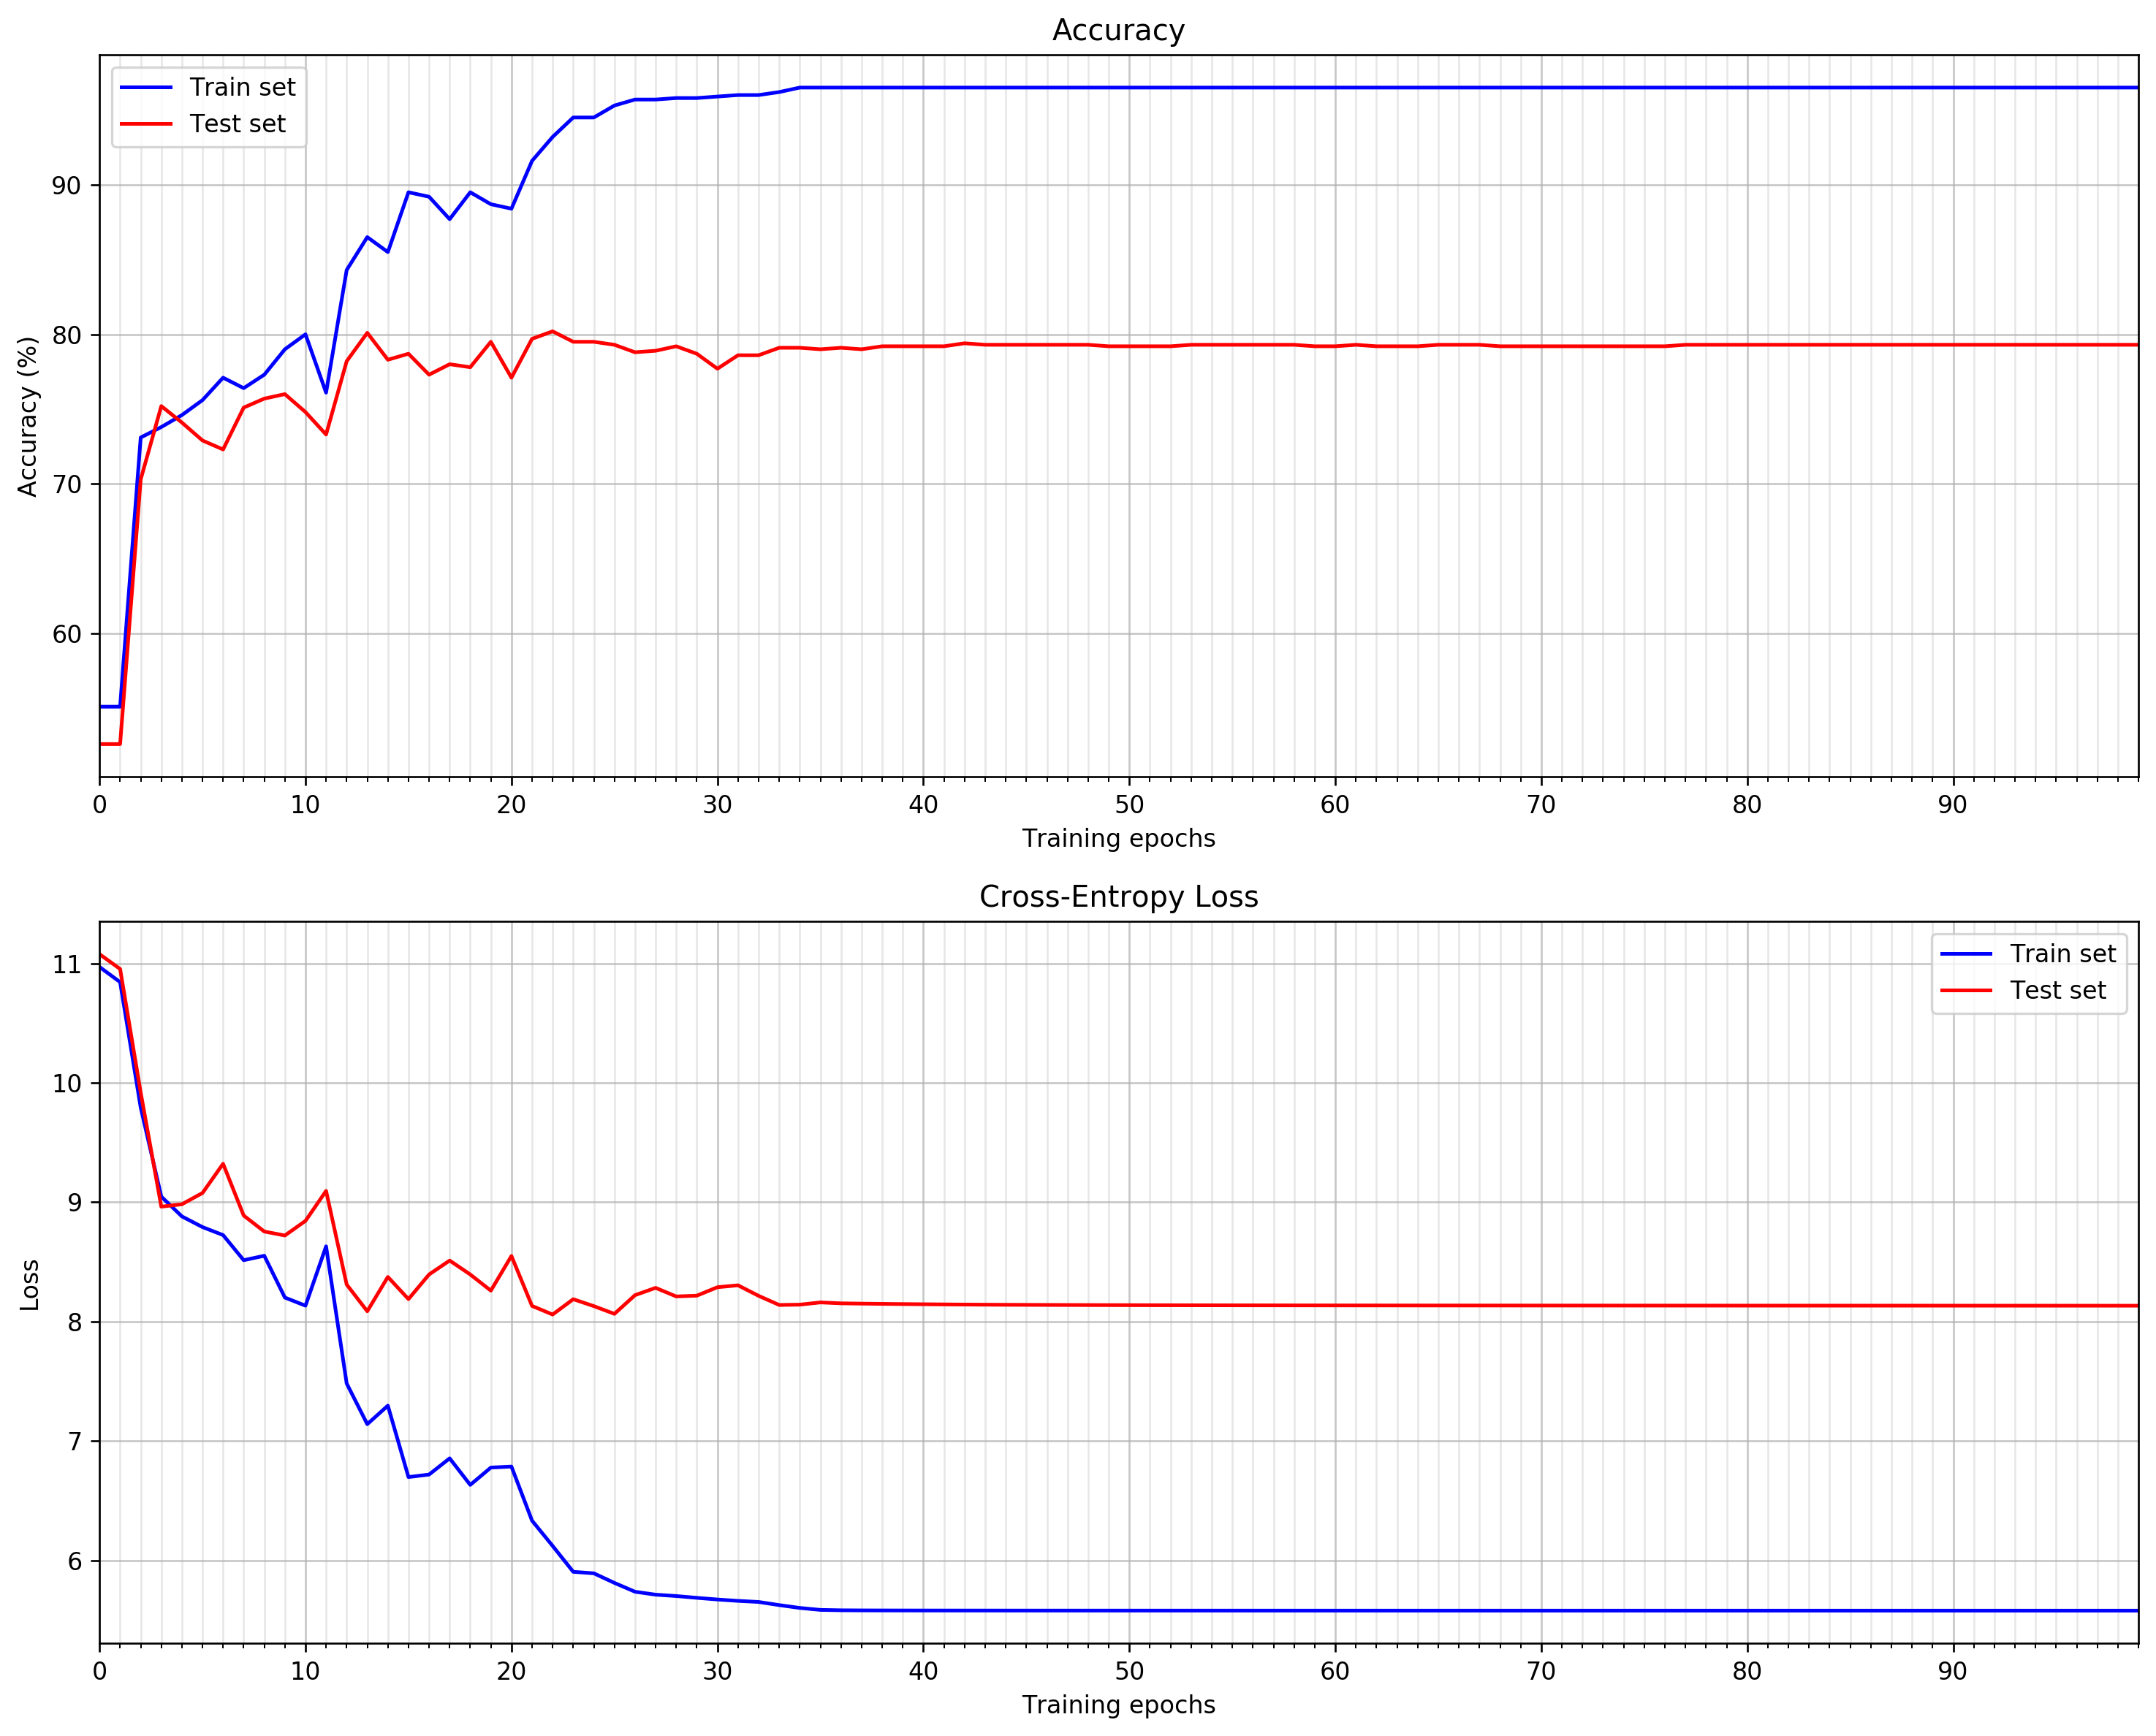

In [28]:
plot_acc_loss(train_accuracies_3, train_losses_3, test_accuracies_3, test_losses_3)

In [29]:
accuracies_3 = evaluate_model(network_class_3, nb_rounds, nn.CrossEntropyLoss(), device, BATCH_SIZE, 60, {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97})

Round 1: accuracy = 80.50% | loss = 7.9423
Round 2: accuracy = 80.20% | loss = 8.1259
Round 3: accuracy = 79.00% | loss = 8.2021
Round 4: accuracy = 82.30% | loss = 7.7356
Round 5: accuracy = 81.20% | loss = 7.8015
Round 6: accuracy = 79.40% | loss = 8.1939
Round 7: accuracy = 84.00% | loss = 7.4668
Round 8: accuracy = 81.60% | loss = 7.8489
Round 9: accuracy = 81.70% | loss = 7.7844
Round 10: accuracy = 81.30% | loss = 7.8616
Round 11: accuracy = 78.10% | loss = 8.3710
Round 12: accuracy = 81.10% | loss = 7.9099
Round 13: accuracy = 81.70% | loss = 7.8397
Round 14: accuracy = 82.80% | loss = 7.5279
Round 15: accuracy = 85.10% | loss = 7.3385


In [30]:
print("The mean accuracy is: {a:0.2f}".format(a = accuracies_3.mean()))
print("The accuracy std is: {s:0.4f}".format(s = accuracies_3.std()))

The mean accuracy is: 81.33
The accuracy std is: 1.8208


#### 2. with the use of an auxialiry loss (similar to the one used in GoogLeNet) having the same objective as the primary loss

In [31]:
network_3_aux_loss = network_class_3(aux_loss = True).to(device=device)
print(network_3_aux_loss)

Net3(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc1_aux): Linear(in_features=800, out_features=128, bias=True)
  (fc2_aux): Linear(in_features=128, out_features=2, bias=True)
)


In [32]:
train_accuracies_3_aux, train_losses_3_aux, test_accuracies_3_aux, test_losses_3_aux = train_model(network_3_aux_loss,
                                                                           train_input, 
                                                                           train_target, 
                                                                           train_classes, 
                                                                           test_input, 
                                                                           test_target, 
                                                                           test_classes, 
                                                                           100, 
                                                                           BATCH_SIZE, 
                                                                           {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97}, 
                                                                           logging = True,
                                                                           with_aux_loss = True)

Epoch       Time    Train loss     Train accuracy      Test loss      Test accuracy       
[100/100]   102s    8.0018         98.2000             11.4187        82.9000             


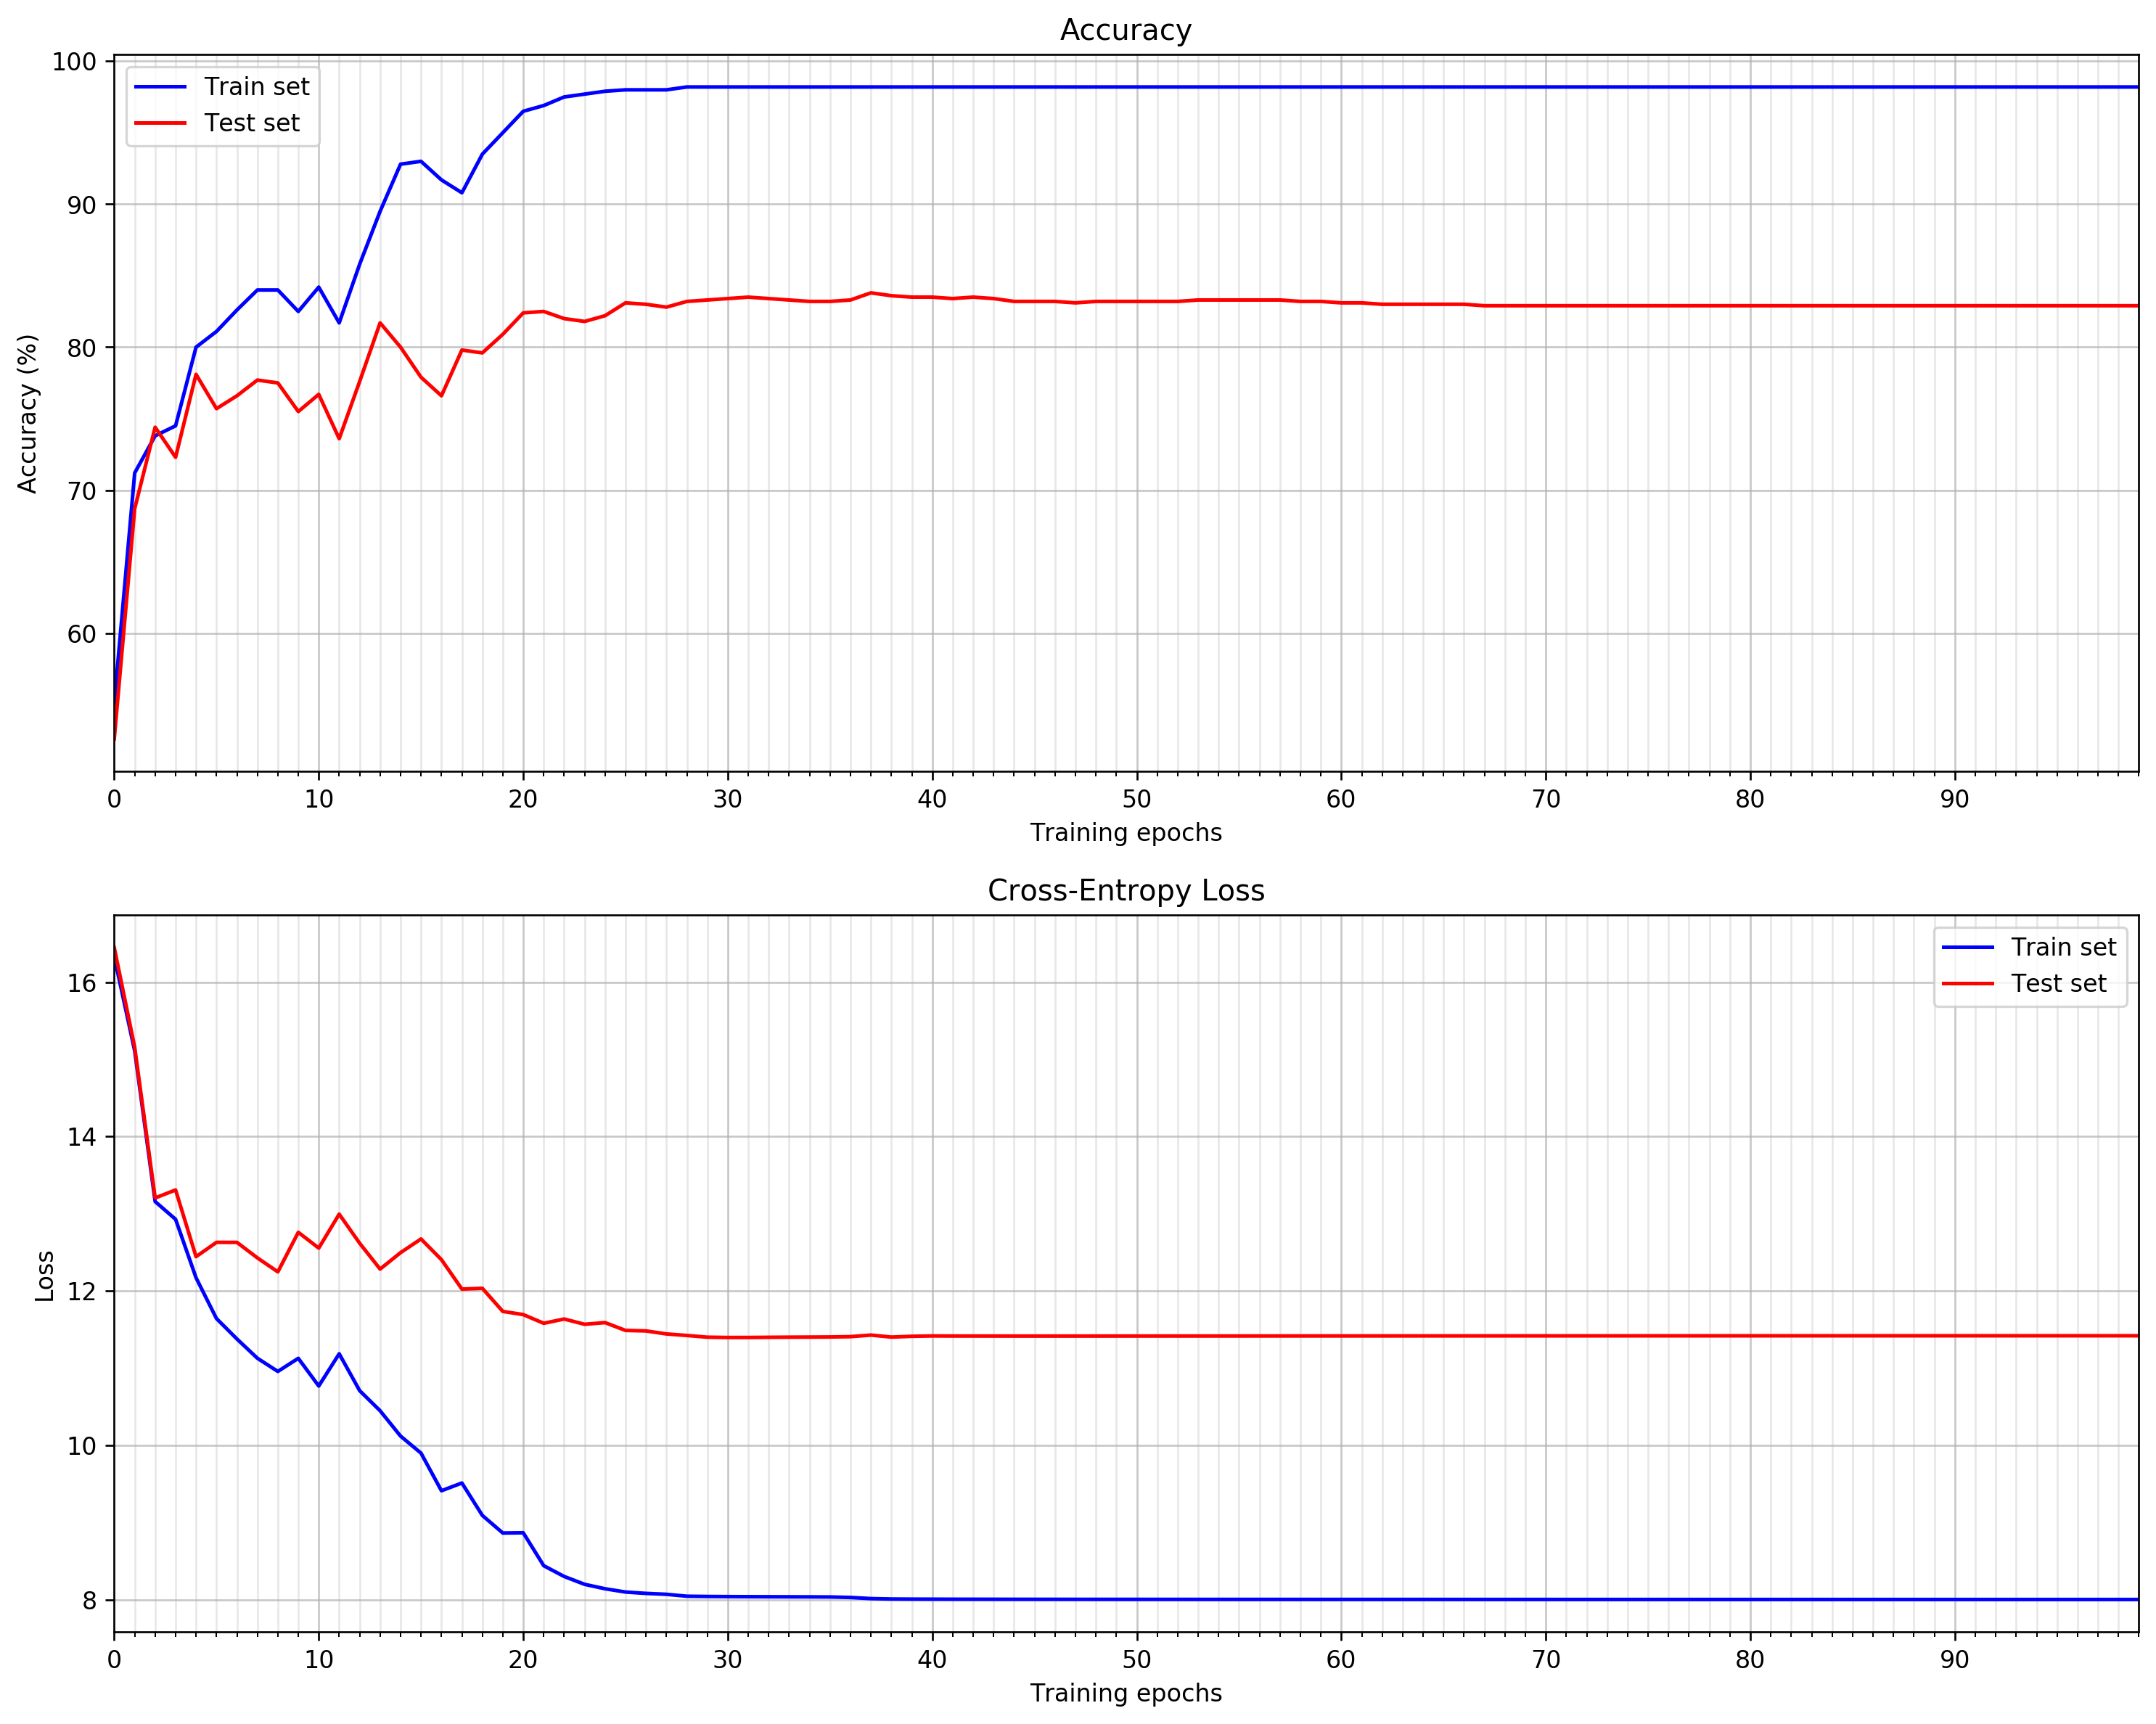

In [33]:
plot_acc_loss(train_accuracies_3_aux, train_losses_3_aux, test_accuracies_3_aux, test_losses_3_aux)

In [34]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
best_alpha_2, best_accuracy_2 = cross_validation(network_class_3,
                                             K,
                                             train_input,
                                             train_target,
                                             train_classes,
                                             device,
                                             BATCH_SIZE,
                                             50,
                                             alphas)

aux_loss_alpha = 0.1 - mean accuracy = 77.9
aux_loss_alpha = 0.3 - mean accuracy = 80.3
aux_loss_alpha = 0.5 - mean accuracy = 78.8
aux_loss_alpha = 0.7 - mean accuracy = 79.5
aux_loss_alpha = 0.9 - mean accuracy = 80.6


In [35]:
print("The best aux_loss_alpha is: {a}".format(a = best_alpha_2))

The best aux_loss_alpha is: 0.9


In [36]:
accuracies_3_aux = evaluate_model(network_class_3,
                                    nb_rounds,
                                    nn.CrossEntropyLoss(),
                                    device, BATCH_SIZE,
                                    60,
                                    {'lr': 0.1, 'momentum':0.9, 'weight_decay': 0.0, 'gamma': 0.97},
                                    {'aux_loss': True},
                                    with_aux_loss = True,
                                    aux_loss_alpha = best_alpha_2)

Round 1: accuracy = 83.80% | loss = 14.2080
Round 2: accuracy = 82.00% | loss = 14.5237
Round 3: accuracy = 81.50% | loss = 14.7092
Round 4: accuracy = 80.80% | loss = 15.2707
Round 5: accuracy = 82.00% | loss = 14.9558
Round 6: accuracy = 82.60% | loss = 14.8839
Round 7: accuracy = 82.00% | loss = 14.7265
Round 8: accuracy = 80.50% | loss = 15.4133
Round 9: accuracy = 79.80% | loss = 15.2580
Round 10: accuracy = 81.30% | loss = 14.9712
Round 11: accuracy = 81.80% | loss = 14.6609
Round 12: accuracy = 82.50% | loss = 15.0578
Round 13: accuracy = 83.50% | loss = 14.4735
Round 14: accuracy = 81.70% | loss = 14.7999
Round 15: accuracy = 81.70% | loss = 14.9537


In [37]:
print("The mean accuracy is: {a:0.2f}".format(a = accuracies_3_aux.mean()))
print("The accuracy std is: {s:0.4f}".format(s = accuracies_3_aux.std()))

The mean accuracy is: 81.83
The accuracy std is: 1.0411
